$\alpha$, $\beta$, $\Lambda$

$x_n$, $x^2$

$x_{n} = $ число

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
[x for x in dir(np) if "ran" in x]

['arange',
 'asfortranarray',
 'fastCopyAndTranspose',
 'isfortran',
 'random',
 'transpose']

In [7]:
help(np.random)

Help on package numpy.random in numpy:

NAME
    numpy.random

DESCRIPTION
    Random Number Generation
    
    Use ``default_rng()`` to create a `Generator` and call its methods.
    
    =============== =========================================================
    Generator
    --------------- ---------------------------------------------------------
    Generator       Class implementing all of the random number distributions
    default_rng     Default constructor for ``Generator``
    =============== =========================================================
    
    ============================================= ===
    BitGenerator Streams that work with Generator
    --------------------------------------------- ---
    MT19937
    PCG64
    Philox
    SFC64
    ============================================= ===
    
    ============================================= ===
    Getting entropy to initialize a BitGenerator
    --------------------------------------------- ---
    Seed

In [14]:
np.random.randint(0, 20)

17

$x_{n} = $ случайное число

In [21]:
N = 100
x_rand_int = np.zeros(N)
x_range = np.arange(N)
for n in x_range:
    x_rand_int[n] = np.random.randint(0, 20)

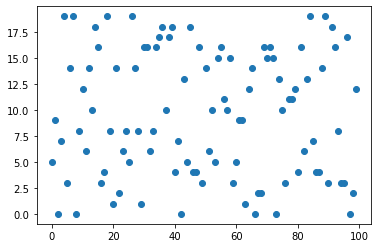

In [22]:
plt.plot(x_range, x_rand_int, 'o')

In [23]:
help(np.random.normal)

Help on built-in function normal:

normal(...) method of numpy.random.mtrand.RandomState instance
    normal(loc=0.0, scale=1.0, size=None)
    
    Draw random samples from a normal (Gaussian) distribution.
    
    The probability density function of the normal distribution, first
    derived by De Moivre and 200 years later by both Gauss and Laplace
    independently [2]_, is often called the bell curve because of
    its characteristic shape (see the example below).
    
    The normal distributions occurs often in nature.  For example, it
    describes the commonly occurring distribution of samples influenced
    by a large number of tiny, random disturbances, each with its own
    unique distribution [2]_.
    
    .. note::
        New code should use the ``normal`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    loc : float or array_like of floats
        Mean ("centre") of the distribution

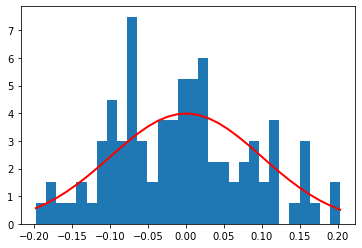

In [28]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, N)
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
               linewidth=2, color='r')

In [36]:
def plot_rand():
    N = 100
    x_rand_int = np.zeros(N)
    x_range = np.arange(N)
    for n in x_range:
        x_rand_int[n] = np.random.randint(0, 20)

    mu = 10
    sigma = 5
    x_rand_norm = np.random.normal(mu, sigma, N)
    plt.plot(x_range, x_rand_int, 'o')
    plt.plot(x_range, x_rand_norm, 'x')

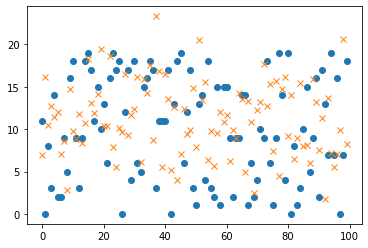

In [37]:
plot_rand()

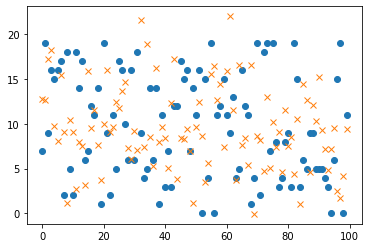

In [38]:
plot_rand()

$x_n = x_{n - 1}$ + шум

In [69]:
N = 100
x_range = np.arange(N)
x_lin_norm = np.zeros(N)

for n in x_range[1:]:
#     print('n', n)
    noise =  np.random.normal(mu, 0, 1)
    # print(f"x_lin_norm[{n}], x_lin_norm[{n-1}] = {x_lin_norm[n]}, {x_lin_norm[n-1]}")
    x_lin_norm[n] = 0.7*x_lin_norm[n-1] + noise

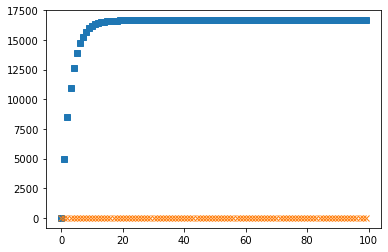

In [71]:
x_rand_norm = np.random.normal(mu, sigma, N)
plt.plot(x_range, x_lin_norm, 's')
plt.plot(x_range, x_rand_norm, 'x')

$x_n = a \cdot x_{n-1}$, $x_0$ = x0 

In [102]:
def get_seq(x_range, a, x0):
    x_lin = []

    x_lin.append(x0)

    for n in x_range[1:]:
        x_lin.append(a*x_lin[n-1])

    return np.array(x_lin)

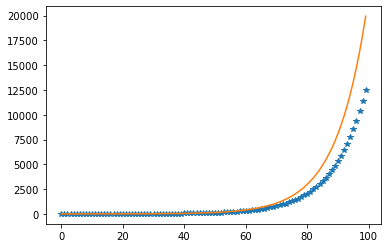

In [101]:
plt.plot(x_range, get_seq(x_range, 1.1, 1), '*')
# plt.plot(x_range, np.exp(0.1*x_range))

$x_n = a \cdot x_{n-1} (1 -  x_{n-1})$ 

$x_n = a \cdot x_{n-1}  - a \cdot x_{n-1}^2 $ 


In [103]:
def get_seq_2(x_range, a, x0):
    result = []
    result.append(x0)
    for n in x_range[1:]:
        xn_1 = result[n-1]
        result.append(a*xn_1*(1 - xn_1 ))

    return np.array(result)

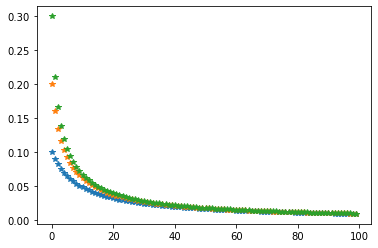

In [116]:
a_list = np.linspace(0.1,0.3, 3)

for a in a_list:
    plt.plot(x_range, get_seq_2(x_range, 1, a), '*') 
    

$x_n = f (x_{n-1}) $ 

In [118]:
def f(x, a):
    return a*x*(1 - x)

(-0.05, 1.05, -0.024989587671803416, 0.5247813411078717)

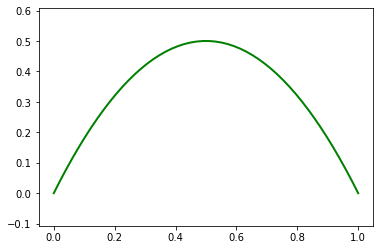

In [120]:
x = np.linspace(0, 1)
plt.plot(x, f(x, 2), color='green', linewidth=2)
plt.axis('equal')

In [147]:
x0 = 0.1
a_list = [2.5, 3.5, 3.7]

def plot_a(a, n):
    fig, ax = plt.subplots() 
    xn_1 = x0
    for i in range(n):
        xn = f(xn_1, a)
        ax.plot([i], [xn], 'o', color='k', alpha=(i + 1) / n)
        ax.set_title(f"a = {a}")
        xn_1 = xn

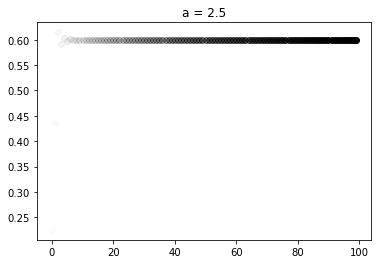

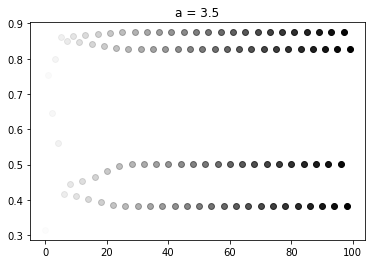

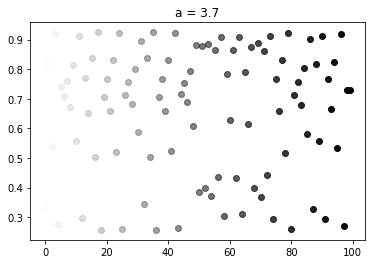

In [146]:
for a in a_list:
    plot_a(a, 100)

In [172]:
N = 1000
a_array = np.linspace(2.5, 4.0, N)
a_array

array([2.5       , 2.5015015 , 2.503003  , 2.5045045 , 2.50600601,
       2.50750751, 2.50900901, 2.51051051, 2.51201201, 2.51351351,
       2.51501502, 2.51651652, 2.51801802, 2.51951952, 2.52102102,
       2.52252252, 2.52402402, 2.52552553, 2.52702703, 2.52852853,
       2.53003003, 2.53153153, 2.53303303, 2.53453453, 2.53603604,
       2.53753754, 2.53903904, 2.54054054, 2.54204204, 2.54354354,
       2.54504505, 2.54654655, 2.54804805, 2.54954955, 2.55105105,
       2.55255255, 2.55405405, 2.55555556, 2.55705706, 2.55855856,
       2.56006006, 2.56156156, 2.56306306, 2.56456456, 2.56606607,
       2.56756757, 2.56906907, 2.57057057, 2.57207207, 2.57357357,
       2.57507508, 2.57657658, 2.57807808, 2.57957958, 2.58108108,
       2.58258258, 2.58408408, 2.58558559, 2.58708709, 2.58858859,
       2.59009009, 2.59159159, 2.59309309, 2.59459459, 2.5960961 ,
       2.5975976 , 2.5990991 , 2.6006006 , 2.6021021 , 2.6036036 ,
       2.60510511, 2.60660661, 2.60810811, 2.60960961, 2.61111

In [173]:
x = 1e-5 * np.ones(N)

In [174]:
x = f(x, a_array)
# x # выведем все значения

In [175]:
# насчитаем значения отображения и сохраним их в матрице X
last = 100
X = np.zeros((len(a_array), 100))

# при необходимости экономии используемой оперативной памяти так делать не рекомендуется.

In [176]:
iterations = 1000
for n in range(iterations - last):
    x = f(x, a_array)
    
for n in range(last):
    X[:, n] = x
    x = f(x, a_array)

по оси x - изменение параметра, по оси y  все значения X для параметра 

Text(0.5, 1.0, 'Bifurcation diagram')

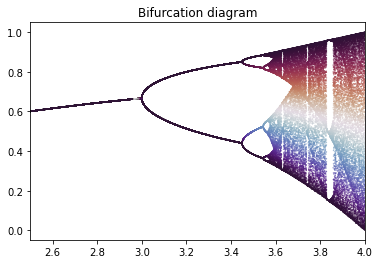

In [180]:
for n in range(N):
    values = X[n,:]
    x_range = a_array[n]*np.ones(len(values))
    plt.scatter(x_range, values, c=values, s=0.1, 
                cmap=plt.cm.twilight_shifted)
plt.xlim(2.5, 4)
plt.title("Bifurcation diagram")

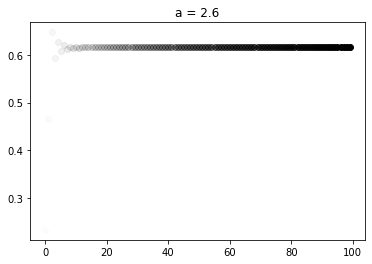

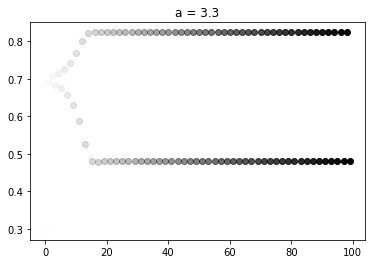

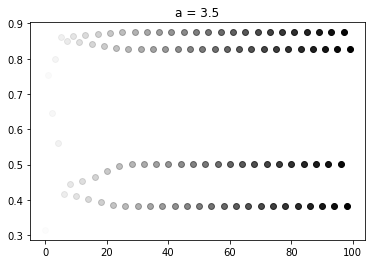

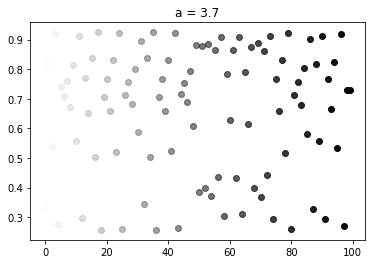

In [182]:
a_list = [2.6, 3.3, 3.5, 3.7]
for a in a_list:
    plot_a(a, 100)